In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# incorporate some stylig for plots using seaborn
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
#read csv using panda
dataFrame = pd.read_csv('fortune500.csv')                                  
dataFrame.columns = ['year', 'rank', 'company', 'revenue', 'profit']

Column Types

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object
DataFrame Head

   year  rank           company  revenue profit
0  1955     1    General Motors   9823.5    806
1  1955     2       Exxon Mobil   5661.4  584.8
2  1955     3        U.S. Steel   3250.4  195.4
3  1955     4  General Electric   2959.1  212.6
4  1955     5            Esmark   2510.8   19.1

Total entries: 25500

Invalid Profit Entries

Invalid Entry Count: 369

     year  rank                company  revenue profit
228  1955   229                 Norton    135.0    N.A
290  1955   291        Schlitz Brewing    100.0    N.A
294  1955   295  Pacific Vegetable Oil     97.9    N.A
296  1955   297     Liebmann Breweries     96.0    N.A
352  1955   353     Minneapolis-Moline     77.4    N.A


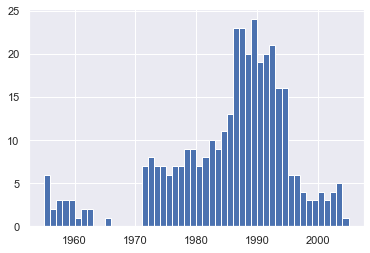

c:\program files\python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value



Rows (after removal of non-numeric profict rows): 25131






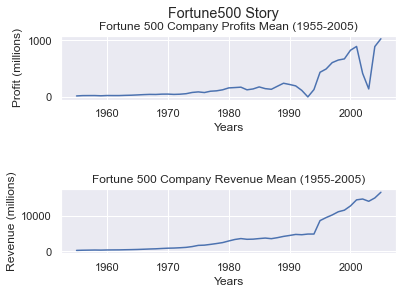

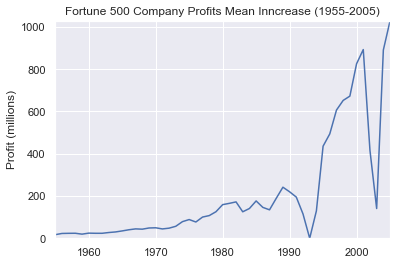

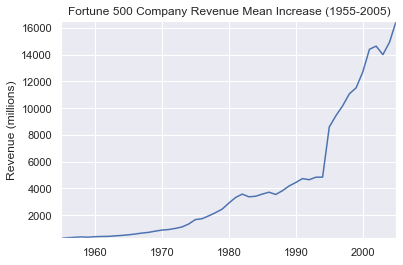

In [4]:
print ("=========================")
print("Column Types\n")

print (dataFrame.dtypes)
print ("=========================")
print ("DataFrame Head\n")
print (dataFrame.head())
print("\nTotal entries: " + str(len(dataFrame)) + "\n")
print ("=========================")
print ("Invalid Profit Entries")
non_numeric_profits = dataFrame.profit.str.contains('[^0-9.-]')
dataFrame.loc[dataFrame['profit'].str.contains('[^0-9.-]'), 'profit'] = "N.A"
print("\nInvalid Entry Count: " + str(len(dataFrame.profit[non_numeric_profits])) + "\n")
print(dataFrame.loc[non_numeric_profits].head())
print ("=========================")

"""
# histogram #
To create a histogram the first step is to create bin of the ranges, 
then distribute the whole range of the values into a series of intervals, 
and the count the values which fall into each of the intervals.
Bins are clearly identified as consecutive, non-overlapping intervals of variables.
The matplotlib.pyplot.hist() function is used to compute and create histogram of x.
"""
bin_sizes, _, _ = plt.hist(dataFrame.year[non_numeric_profits], bins=range(1955, 2006))
plt.show()

# elimintae non-numeric rows from dataframe
df = dataFrame.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)
print("\nRows (after removal of non-numeric profict rows): " + str(len(df)) + "\n")

# trim df 
df_trim = df.loc[:,['year', 'revenue', 'profit']]
# yearly data
df_mean = df_trim.groupby('year').mean()
# x axis for plot
x = df_mean.index

# route 1 for plots
#plot1
plt.subplot(311)
plt.plot(x, df_mean.profit)
plt.xlabel("Years")
plt.ylabel("Profit (millions)")
plt.title("Fortune 500 Company Profits Mean (1955-2005)")
print("\n\n")
#plot2
plt.subplot(313)
plt.plot(x, df_mean.revenue)
plt.xlabel("Years")
plt.ylabel("Revenue (millions)")
plt.title("Fortune 500 Company Revenue Mean (1955-2005)")

plt.suptitle('Fortune500 Story')
plt.show()



# same plots in a differnt route
y1 = df_mean.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
fig, ax = plt.subplots()
plot(x, y1, ax, 'Fortune 500 Company Profits Mean Inncrease (1955-2005)', 'Profit (millions)')

y2 = df_mean.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Fortune 500 Company Revenue Mean Increase (1955-2005)', 'Revenue (millions)')


